<a href="https://www.kaggle.com/code/amanmalik0302/eda-exploring-nifty?scriptVersionId=165512042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#plotly
!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#datetime
from datetime import datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.3 MB/s eta 0:00:00


Welcome to this EDA notebook focused on the NIFTY-50 index, India’s benchmark broad-based stock market index. The NIFTY 50 represents the weighted average of 50 Indian company stocks across 17 sectors. It plays a crucial role in understanding the overall health of the Indian equity market.

In this notebook, we’ll explore the given NIFTY-50 data, along with the sectoral indices, and visualize them to extract valuable insights. 

# About NIFTY 50

![](https://imgur.com/fEgI9b6.png)


The NIFTY 50 index is [National Stock Exchange of India's](https://en.wikipedia.org/wiki/National_Stock_Exchange_of_India) benchmark broad based stock market index for the Indian equity market. The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange. Nifty 50 is owned and managed by NSE Indices. It is one of the two main stock indices used in India, the other being the [BSE Sensex](https://en.wikipedia.org/wiki/BSE_SENSEX).
[Source:Wikipedia](https://en.wikipedia.org/wiki/NIFTY_50)






# 1. A first look at NIFTY 50 data

In [2]:
nifty_50 = pd.read_csv('../input/nifty-indices-dataset/NIFTY 50.csv',parse_dates=["Date"])
pd.options.display.max_rows = 100
nifty_50.head()

,Date,Open,High,Low,Close,P/E,P/B,Div Yield %
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,26.25,4.69,0.94


In [3]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5970 entries, 0 to 5969
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5970 non-null   datetime64[ns]
 1   Open         5970 non-null   float64       
 2   High         5970 non-null   float64       
 3   Low          5970 non-null   float64       
 4   Close        5970 non-null   float64       
 5   P/E          5970 non-null   float64       
 6   P/B          5970 non-null   float64       
 7   Div Yield %  5970 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 373.2+ KB


## 1.1 Stock Data Fields Description

Now that our data has been converted into the desired format, let’s take a look at its various columns for further analysis.

* **Date:** This column contains timestamps in the datetime64[ns] format. It represents the date and time when the stock data was recorded.
* **Open:** The opening price of the stock on a given trading day. It is the price at which the first trade occurs after the market opens.
* **High:** The highest price reached by the stock during the trading day.
* **Low:** The lowest price reached by the stock during the trading day.
* **Close:**  The closing price of the stock on that trading day. It is the last traded price before the market closes.
* **P/E (Price-to-Earnings) Ratio:** The ratio of the stock price to its book value per share. It reflects the market’s valuation of the company relative to its net assets.
* **P/B (Price-to-Book) Ratio:** or the dividend yield is the amount of money a company pays shareholders (over the course of a year) for owning a share of its stock divided by its current stock price—displayed as a percentage.  
* **Dividend Yield %:** The percentage of dividend income relative to the stock price. It represents the annual dividend payment as a proportion of the stock’s current value.



## 1.2 Missing values 

In [4]:
nifty_50.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
P/E            0
P/B            0
Div Yield %    0
dtype: int64

* There are no missing values in the dataset

## 1.3 Visualizing the NIFTY FIFTY DATA

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['High'],
         name='High Price',
    line=dict(color='#0099cc'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['Low'],
         name='Low Price',
    line=dict(color=' #ffc266'),
    opacity=0.8))
        
    
fig.update_layout(title_text='NIFTY 50 High vs Low Trend',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')

fig.show()

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['Open'],
         name='Open Price',
    line=dict(color='#80c1ff'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['Close'],
         name='Closing Price',
    line=dict(color='#ff8533'),
    opacity=0.8))
        
    
fig.update_layout(title_text='NIFTY 50 Open vs Close Price Trend',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')

fig.show()

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['Close'],
         name='Closing Price',
    line=dict(color=' #ffbf80'),
    opacity=0.8))

    
fig.update_layout(title_text='NIFTY 50 Closing Price',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')

fig.show()

## 1.4 P/E vs P/B Ratio : Which one to use?

[P/E ratio is a popular measure](https://towardsdatascience.com/visualizing-the-stock-market-with-tableau-c0a7288e7b4d) of how expensive a company’s stock is. It is simply the company’s market capitalization divided by its net income — in other words, how much does it cost us to buy $1 of a particular company’s earnings. The higher the P/E ratio, all other things equal, the more expensive a stock is perceived to be.the P/E ratio shows what the market is willing to pay today for a stock based on its past or future earnings. A high P/E could mean that a stock's price is high relative to earnings and possibly overvalued. Conversely, a low P/E might indicate that the current stock price is low relative to earnings. 

![](https://imgur.com/mNCjWPD.png)

The **P/B ratio** on the other hand measures the market's valuation of a company relative to its book value.P/B ratio is used by value investors to identify potential investments and P/B ratios under 1 are typically considered solid investments.

![](https://imgur.com/uFGqIRV.png)

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['P/E'],
         name='P/E Ratio',
    line=dict(color='#00cccc'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['P/B'],
         name='P/B Ratio',
    line=dict(color='#ffb366'),
    opacity=0.8))
        
    
fig.update_layout(title_text='P/E vs P/B Ratio',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')

fig.show()

Whether PE is better or PB depends on the industry in question. Sometimes you need to take both into account to get an accurate picture of a company’s health and its financial prospects.YOu can read more about it here:[PE versus PB ratio: Which one to use to assess a company’s health](https://www.livemint.com/money/personal-finance/pe-versus-pb-ratio-which-one-to-use-to-assess-a-company-s-health-1568132592441.html)

# 2. Looking at market performance 2019 onwards

In [9]:
nifty_50_2019 = nifty_50[nifty_50['Date'] >= '2019-01-01']
nifty_50_2019.head()

,Date,Open,High,Low,Close,P/E,P/B,Div Yield %
4729,2019-01-01,10881.70,10923.60,10807.10,10910.10,26.28,3.40,1.24
4730,2019-01-02,10868.85,10895.35,10735.05,10792.50,26.00,3.36,1.25
4731,2019-01-03,10796.80,10814.05,10661.25,10672.25,25.71,3.32,1.26
4732,2019-01-04,10699.70,10741.05,10628.65,10727.35,25.84,3.34,1.26
4733,2019-01-07,10804.85,10835.95,10750.15,10771.80,25.95,3.36,1.25


In [10]:
df=nifty_50_2019
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(title_text='Candle Plot for Stock Values')
fig.show()

## 2.1 : NIFTY FIFTY MAJOR FALLS SINCE 2019

In [11]:
fig = px.line(nifty_50_2019, x='Date', y='Close', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',
    title='NIFTY 50 : Major single day falls 2019 onwards',
    yaxis_title='NIFTY 50 Stock',
    shapes = [dict(x0='2020-03-23', x1='2020-03-23', y0=0, y1=1, xref='x', yref='paper', line_width=2,opacity=0.3,line_color='red',editable=False),
             dict(x0='2019-09-3', x1='2019-09-3', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red'),
             dict(x0='2020-02-1', x1='2020-02-1', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red'),
             dict(x0='2020-03-12', x1='2020-03-12', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red'),
             dict(x0='2023-01-23', x1='2023-01-23', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red'),
             dict(x0='2022-06-13', x1='2022-06-13', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red')
             ],
    annotations=[dict(x='2020-03-23', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='Lockdown Phase-1 announced'),
                dict(x='2019-09-3', y=0.05, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='Multiple PSU Bank Merger Announcements'),
                dict(x='2020-02-1', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Union Budget,coronavirus pandemic'),
                dict(x='2020-03-12', y=0.4, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Coronavirus declared Pandemic by WHO'),
                  dict(x='2023-01-23', y=0.3, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Interest Rate Hikes by Central Banks'),
                 dict(x='2022-06-13', y=0.4, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='US inflation surged, and a COVID-19 warning from Beijing')]
)
fig.show()

* **Lockdown Phase-1 (March 23, 2020)**
On March 23, 2020, India announced a nationwide lockdown due to the COVID-19 pandemic. This drastic measure significantly impacted economic activities, leading to a sharp decline in stock markets, including the NIFTY 50.
* **Multiple PSU Bank Merger Announcements (September 3, 2019)**
On September 3, 2019, the Indian government announced the merger of several public sector banks (PSBs). Such consolidation raised concerns about asset quality, provisioning, and overall stability, affecting investor sentiment.
* **Union Budget and Coronavirus Pandemic (February 1, 2020)**
The Union Budget presented on February 1, 2020, had implications for various sectors. Additionally, the emergence of COVID-19 as a global pandemic triggered panic selling across markets, causing a significant drop in the NIFTY 50.
* **Coronavirus Declared Pandemic by WHO (March 12, 2020)**
The World Health Organization (WHO) officially declared COVID-19 a pandemic on March 12, 2020. This declaration intensified market uncertainty and led to widespread selling.
* **Interest Rate Hikes by Central Banks (January 23, 2023)**
Central banks’ decisions to raise interest rates can impact market liquidity and investor behavior. A rate hike on January 23, 2023, might have contributed to market volatility.
* **US Inflation Surge and COVID-19 Warning from Beijing (June 13, 2022)**
A surge in US inflation and a COVID-19 warning from Beijing on June 13, 2022, likely added to market jitters and influenced the NIFTY 50’s downward movement.

## 2.2 NIFTY 50 : Major single day gains 2019 onwards

In [12]:
fig = px.line(nifty_50_2019, x='Date', y='Close', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',
    title='NIFTY 50 : Major single day gains 2019 onwards',
    yaxis_title='NIFTY 50 Stock',
    shapes = [dict(x0='2019-05-20', x1='2019-05-20', y0=0, y1=1, xref='x', yref='paper', line_width=2,opacity=0.3,line_color='green',editable=False),
             dict(x0='2020-05-23', x1='2020-05-23', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green'),
             dict(x0='2019-09-20', x1='2019-09-20', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green'),
             dict(x0='2020-04-07', x1='2020-04-07', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green'),
             dict(x0='2023-09-15', x1='2023-09-15', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green')],
    annotations=[dict(x='2019-05-20', y=0.54, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Exit-Polls predict majority'),
                 dict(x='2019-05-20', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='for BJP government'),
                dict(x='2019-09-3', y=0.08, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='2019 General Elections'),
                 dict(x='2019-09-3', y=0.05, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='results announced'),
                dict(x='2019-09-20', y=0.54, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='cut in the corporate tax rate announced'),
                dict(x='2020-04-07', y=0.4, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Italy Coronavirus numbers went down'),
                 dict(x='2023-09-15', y=0.3, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text=' improving economic growth, rising personal incomes ')]
)
fig.show()

* **Exit Polls Predict Majority (May 20, 2019)**
Exit polls indicated a majority for the Bharatiya Janata Party (BJP) government in the 2019 General Elections. This positive sentiment boosted investor confidence and contributed to the NIFTY’s rise.
* **2019 General Elections Results Announced (September 3, 2019)**
The official results of the 2019 General Elections confirmed the BJP’s victory. Political stability and continuity of policies are favorable for the stock market, leading to an upward trend.
* **Cut in Corporate Tax Rate (September 20, 2019)**
The Indian government announced a significant reduction in corporate tax rates, aiming to boost economic growth and attract investments. This move positively impacted corporate earnings and market sentiment.
* **Italy’s Coronavirus Numbers Decline (April 7, 2020)**
As Italy’s COVID-19 situation improved, global markets gained confidence. Investors saw signs of recovery, and the NIFTY responded positively.
* **Improving Economic Growth and Rising Personal Incomes (September 15, 2023)**
Economic indicators such as GDP growth, industrial production, and rising personal incomes play a crucial role in market performance. Positive economic data can drive investor optimism and propel the NIFTY upward.

# 3. Performance of other NIFTY Sectoral Indices in 2020


In [13]:
nifty_auto = pd.read_csv('../input/nifty-indices-dataset/NIFTY AUTO.csv',parse_dates=["Date"])
nifty_bank = pd.read_csv('../input/nifty-indices-dataset/NIFTY BANK.csv',parse_dates=["Date"])
nifty_fmcg = pd.read_csv('../input/nifty-indices-dataset/NIFTY FMCG.csv',parse_dates=["Date"])
nifty_IT = pd.read_csv('../input/nifty-indices-dataset/NIFTY IT.csv',parse_dates=["Date"])
nifty_metal = pd.read_csv('../input/nifty-indices-dataset/NIFTY METAL.csv',parse_dates=["Date"])
nifty_pharma = pd.read_csv('../input/nifty-indices-dataset/NIFTY PHARMA.csv',parse_dates=["Date"])


#Fill in missing values
nifty_auto.fillna(method='ffill',inplace=True)
nifty_bank.fillna(method='ffill',inplace=True)
nifty_fmcg.fillna(method='ffill',inplace=True)
nifty_IT.fillna(method='ffill',inplace=True)
nifty_metal.fillna(method='ffill',inplace=True)
nifty_pharma.fillna(method='ffill',inplace=True)


/tmp/ipykernel_19/904354778.py:10: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_19/904354778.py:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_19/904354778.py:12: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_19/904354778.py:13: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_19/904354778.py:14: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_19/904354778.py:15: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use

## Sectoral Indices
1. **Nifty Auto Index:**
* Represents the automobile sector in India.
* Includes major automobile manufacturers, suppliers, and related companies.
* Tracks the performance of auto stocks.
2. **Nifty Bank Index:**
* Comprises banking and financial services companies.
* Reflects the overall health of the banking sector.
* Includes both public and private sector banks.
3. **Nifty FMCG Index:**
* Focuses on the fast-moving consumer goods (FMCG) sector.
* Includes companies producing everyday household products.
* Captures consumer demand trends.
4. **Nifty IT Index:**
* Represents the information technology (IT) sector.
* Includes software services, IT consulting, and related companies.
* Tracks the performance of tech stocks.
5. **Nifty Metal Index:**
* Encompasses metal and mining companies.
* Includes steel, aluminum, copper, and other metal producers.
* Sensitive to global commodity prices.
6. **Nifty Pharma Index:**
* Comprises pharmaceutical and healthcare companies.
* Includes drug manufacturers, biotech firms, and healthcare providers.
* Influenced by regulatory approvals and R&D developments.

## 3.1 Comparing Closing prices of different sectoral indices

In [14]:
nifty_auto_2019 = nifty_auto[nifty_auto['Date'] > '2019-12-31']
nifty_bank_2019 = nifty_bank[nifty_bank['Date'] > '2019-12-31']
nifty_fmcg_2019 = nifty_fmcg[nifty_fmcg['Date'] > '2019-12-31']
nifty_IT_2019 = nifty_IT[nifty_IT['Date'] > '2019-12-31']
nifty_metal_2019 = nifty_metal[nifty_metal['Date'] > '2019-12-31']
nifty_pharma_2019 = nifty_pharma[nifty_pharma['Date'] > '2019-12-31']

d = {'NIFTY Auto index': nifty_auto_2019['Close'].values, 
     'NIFTY Bank index': nifty_bank_2019['Close'].values,
     'NIFTY FMCG index': nifty_fmcg_2019['Close'].values,
     'NIFTY IT index': nifty_IT_2019['Close'].values,
     'NIFTY Metal index': nifty_metal_2019['Close'].values,
     'NIFTY Pharma index': nifty_pharma_2019['Close'].values,
    }



In [15]:
df = pd.DataFrame(data=d)
df.index=nifty_auto_2019['Date']
df.head()

,NIFTY Auto index,NIFTY Bank index,NIFTY FMCG index,NIFTY IT index,NIFTY Metal index,NIFTY Pharma index
Date,,,,,,
2020-01-01,8210.10,32102.90,30234.25,15722.15,2796.05,8047.10
2020-01-02,8267.45,32443.85,30266.20,15709.65,2869.90,8053.95
2020-01-03,8168.15,32069.25,30109.25,15936.60,2848.35,8111.95
2020-01-06,7978.75,31237.15,29799.30,15879.80,2765.75,7987.35
2020-01-07,8002.50,31399.40,29861.80,15895.20,2785.90,8036.50


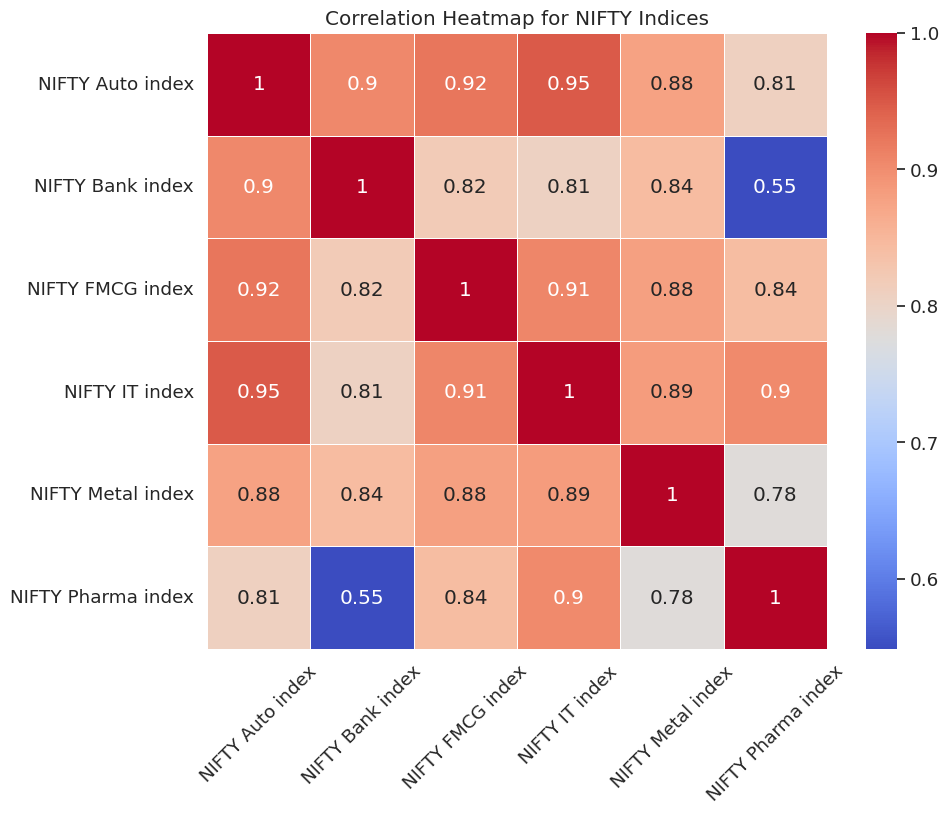

In [16]:
hm = pd.DataFrame(d)
correlation_matrix = hm.corr()

plt.figure(figsize=(10, 8))  
sns.set(font_scale=1.2)  

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


plt.title("Correlation Heatmap for NIFTY Indices")
plt.xticks(rotation=45)  
plt.yticks(rotation=0) 

plt.show()

In [17]:
df.iplot(kind='box')

In [18]:
fig = df.iplot(asFigure=True, subplots=True, subplot_titles=True, legend=False)
fig.show()

/opt/conda/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



# 4. Analysis of COVID-19 Pandemic and Lockdown Effects on NIFTY Indices



In [19]:
fig = df.iplot(asFigure=True, hline=[2,4], vline=['2020-03-23'])
fig.show()

The red vertical line shows the day of the first phase of Lockdown in India.

## 4.1 Lockdown Phase 1 (25 March – 14 April)

 

In [20]:
fig = df.iplot(asFigure=True,
               vspan={'x0':'2020-03-23','x1':'2020-04-14',
                      'color':'rgba(30,30,30,0.3)','color':'teal','fill':True,'opacity':.4})

fig.show()

## 4.2 Lockdown Phase 2 (15 April – 3 May)

In [21]:
fig = df.iplot(asFigure=True,
               vspan={'x0':'2020-04-15','x1':'2020-05-03',
                      'color':'rgba(30,30,30,0.3)','color':'red','fill':True,'opacity':.4})

fig.show()

The shock effects of the COVID-19 pandemic have reverberated across various sectors of the Indian economy, significantly shaping investment decisions and future trends in equity markets. Let’s delve into the specific effects on NIFTY indices:

**NIFTY 50 Index:**<br>
The NIFTY 50 index, representing the weighted average of 50 Indian company stocks across seventeen sectors, experienced significant volatility during the pandemic.
Investor sentiment shifted toward stable Government securities and the pharmaceutical sector due to volatility in other sectors like services and realty.
Lockdown measures, transport restrictions, and migrant laborer movement impacted the overall performance.<br>
**Sectoral Indices:**<br>
**Auto Sector (NIFTY Auto):**<br>
The automobile sector faced challenges due to production halts, supply chain disruptions, and reduced consumer demand.<br>
**Banking Sector (NIFTY Bank):**<br>
Banks grappled with loan moratoriums, asset quality concerns, and economic uncertainty.<br>
**FMCG Sector (NIFTY FMCG):**<br>
Fast-moving consumer goods remained resilient, driven by essential product demand.<br>
**IT Sector (NIFTY IT):**<br>
IT companies adapted to remote work, but global uncertainties affected business prospects.<br>
**Metal Sector (NIFTY Metal):**<br>
Metal companies faced supply chain disruptions and fluctuating commodity prices.<br>
**Pharma Sector (NIFTY Pharma):**<br>
Pharmaceutical stocks gained prominence due to drug research, vaccine development, and healthcare demand.<br>
**Government Measures:**<br>
The Indian government implemented economic stimulus packages, relief measures, and assistance for vulnerable sections.<br>
Lockdown relaxations gradually restored economic activities, but challenges persisted.<br>
**Investor Behavior:**<br>
Investors closely monitored pandemic parameters (cases, fatalities) alongside market trends.<br>
Safe-haven assets gained favor during uncertainty.

# 6.Better Performing Indices Since 2020 

## 6.1 Nifty-Pharma Index

In [22]:
df_a=df['NIFTY Pharma index']
max_val=df_a.max()
min_val=df_a.min()
max_date=df_a[df_a==max_val].index[0]
min_date=df_a[df_a==min_val].index[0]
shape1=dict(kind='line',x0=max_date,y0=max_val,x1=min_date,y1=min_val,color='blue',width=2)
shape2=dict(kind='rect',x0=max_date,x1=min_date,fill=True,color='gray',opacity=.3)

df_a.iplot(shapes=[shape1,shape2])

**Performance Overview:**<br>
The Nifty Pharma Index is designed to reflect the behavior and performance of the pharmaceutical sector in India.<br>
Since March 2020, the Nifty Pharma Index has witnessed significant movements.<br>
**COVID-19 Impact:**<br>
The pandemic had both positive and negative effects on the pharma sector.<br>
**Positive Factors:**<br>
Increased demand for healthcare products, medicines, and vaccines.<br>
Accelerated research and development in drug discovery.<br>
Favorable regulatory environment for pharmaceutical companies.<br>
**Negative Factors:**<br>
Supply chain disruptions due to lockdowns.<br>
Delayed clinical trials and approvals.<br>
Volatility in raw material prices.<br>
**Stock-Specific Trends:**<br>
Pharma stocks like Aurobindo, Cipla, Divis, Dr. Reddy, and Biocon have shown remarkable gains.<br>
The index has approximately re-rated based on estimates of FY22 multiples.<br>
**Investor Sentiment:**<br>
Investors closely monitored vaccine development, drug approvals, and healthcare policies.<br>
Pharma stocks became a safe haven during market uncertainties.<br>
**Future Prospects:**<br>
Continued focus on healthcare infrastructure and innovation.<br>
Regulatory reforms and global collaborations.<br>
Market dynamics will remain influenced by pandemic developments.<br>
Remember that the Nifty Pharma Index reflects the resilience and adaptability of the pharmaceutical sector during challenging times.<br>

# 6.2 Nifty Auto Index

In [23]:
df_a=df['NIFTY Auto index']
max_val=df_a.max()
min_val=df_a.min()
max_date=df_a[df_a==max_val].index[0]
min_date=df_a[df_a==min_val].index[0]
shape1=dict(kind='line',x0=max_date,y0=max_val,x1=min_date,y1=min_val,color='teal',width=2)
shape2=dict(kind='rect',x0=max_date,x1=min_date,fill=True,color='gray',opacity=.3)

df_a.iplot(shapes=[shape1,shape2])

**Performance Overview:**<br>
The Nifty Auto Index represents the automobile sector in India.<br>
Since March 2020, the Nifty Auto Index has experienced significant volatility due to various factors.<br>
**COVID-19 Impact:**<br>
* **Negative Factors:**<br>
Production Halts: Lockdowns disrupted manufacturing and supply chains.<br>
Reduced Demand: Consumer spending declined during the pandemic.<br>
Supply Chain Disruptions: Challenges in sourcing raw materials.<br>
* **Positive Factors:**<br>
Pent-up Demand:<br>
Post-lockdown, demand for vehicles surged.

**Export Opportunities:**<br>
Some auto companies explored international markets.<br>
**Government Initiatives:**<br>
Policies to boost the auto sector.<br>
**Stock-Specific Trends:**<br>
Auto stocks like Maruti Suzuki, Tata Motors, and Mahindra & Mahindra showed resilience.<br>
Electric vehicle (EV) companies gained attention.<br>
**Future Prospects:**<br>
EV adoption and green mobility initiatives.<br>
Recovery in consumer sentiment.<br>
Government policies supporting the auto industry

## 6.3 Nifty IT Index

In [24]:
df_a=df['NIFTY IT index']
max_val=df_a.max()
min_val=df_a.min()
max_date=df_a[df_a==max_val].index[0]
min_date=df_a[df_a==min_val].index[0]
shape1=dict(kind='line',x0=max_date,y0=max_val,x1=min_date,y1=min_val,color='blue',width=2)
shape2=dict(kind='rect',x0=max_date,x1=min_date,fill=True,color='gray',opacity=.3)

df_a.iplot(shapes=[shape1,shape2])

**Performance Overview:**<br>
**Year 2020:** The Nifty IT Index exhibited resilience during the pandemic-induced market volatility. It witnessed fluctuations but managed to recover.<br>
**Year 2021:** The IT sector gained momentum, driven by digital transformation, cloud services, and increased demand for technology solutions.<br>
**Year 2022:** IT stocks continued their upward trajectory, outperforming the broader market.<br>
**Year 2023:** After a brief lag, the Nifty IT Index surged significantly, surpassing the Nifty50’s performance.